1. Importação de bibliotecas

Para começar, importamos algumas bibliotecas como o drive, pandas e numpy, que serão úteis desde o começo. O drive é necessário para importar o dataset Fetal Health, que tem como objetivo prever a saúde fetal e categorizar em:

a) normal: saudável

b) suspeito: condição intermediária; necessita observação

c) patológico: estado crítico; intervenção médica

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

Leitura do dataset e exibição das cinco primeiras linhas do arquivo.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fetal_health.csv')

fh_dataframe = pd.DataFrame(df)

fh_dataframe.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Verificação para saber se existe valores vazios no dataset. Nesse caso, não existem.

In [ ]:
display(fh_dataframe.isnull().sum())

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


Para ter uma noção da situação dos dados, verificamos a média e a mediana, de tal forma que possamos descobrir possíveis anomalias.

In [ ]:
print(fh_dataframe.mean(numeric_only=True))

baseline value                                            133.303857
accelerations                                               0.003178
fetal_movement                                              0.009481
uterine_contractions                                        0.004366
light_decelerations                                         0.001889
severe_decelerations                                        0.000003
prolongued_decelerations                                    0.000159
abnormal_short_term_variability                            46.990122
mean_value_of_short_term_variability                        1.332785
percentage_of_time_with_abnormal_long_term_variability      9.846660
mean_value_of_long_term_variability                         8.187629
histogram_width                                            70.445908
histogram_min                                              93.579492
histogram_max                                             164.025400
histogram_number_of_peaks         

In [ ]:
print(fh_dataframe.median(numeric_only=True))

baseline value                                            133.000
accelerations                                               0.002
fetal_movement                                              0.000
uterine_contractions                                        0.004
light_decelerations                                         0.000
severe_decelerations                                        0.000
prolongued_decelerations                                    0.000
abnormal_short_term_variability                            49.000
mean_value_of_short_term_variability                        1.200
percentage_of_time_with_abnormal_long_term_variability      0.000
mean_value_of_long_term_variability                         7.400
histogram_width                                            67.500
histogram_min                                              93.000
histogram_max                                             162.000
histogram_number_of_peaks                                   3.000
histogram_

Variáveis possivelmente simétricas:

- abnormal_short_term_variability
- mean_value_of_short_term_variability
- mean_value_of_long_term_variability
- histogram_variance
- histogram_number_of_peaks

As outras variáveis possuem algum tipo de assimetria, seja positiva ou negativa.

Exemplos de assimetria positiva: baseline value e histogram_mode (valores muito altos)

Exemplos de assimetria negativa: fetal_movement (valor muito baixo)


Checagem da variância e intervalo.

In [ ]:
print(fh_dataframe.std(numeric_only=True))

baseline value                                             9.840844
accelerations                                              0.003866
fetal_movement                                             0.046666
uterine_contractions                                       0.002946
light_decelerations                                        0.002960
severe_decelerations                                       0.000057
prolongued_decelerations                                   0.000590
abnormal_short_term_variability                           17.192814
mean_value_of_short_term_variability                       0.883241
percentage_of_time_with_abnormal_long_term_variability    18.396880
mean_value_of_long_term_variability                        5.628247
histogram_width                                           38.955693
histogram_min                                             29.560212
histogram_max                                             17.944183
histogram_number_of_peaks                       

In [ ]:
print(fh_dataframe.max(numeric_only=True) - fh_dataframe.min(numeric_only=True))

baseline value                                             54.000
accelerations                                               0.019
fetal_movement                                              0.481
uterine_contractions                                        0.015
light_decelerations                                         0.015
severe_decelerations                                        0.001
prolongued_decelerations                                    0.005
abnormal_short_term_variability                            75.000
mean_value_of_short_term_variability                        6.800
percentage_of_time_with_abnormal_long_term_variability     91.000
mean_value_of_long_term_variability                        50.700
histogram_width                                           177.000
histogram_min                                             109.000
histogram_max                                             116.000
histogram_number_of_peaks                                  18.000
histogram_

Checagem dos percentis.

In [ ]:
fh_dataframe.quantile([0,.25,.50,.75,1], axis=0, numeric_only=True)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0.00,106.0,0.000,0.000,0.000,0.000,0.000,0.000,12.0,0.2,0.0,...,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0,1.0
0.25,126.0,0.000,0.000,0.002,0.000,0.000,0.000,32.0,0.7,0.0,...,67.0,152.0,2.0,0.0,129.0,125.0,129.0,2.0,0.0,1.0
0.50,133.0,0.002,0.000,0.004,0.000,0.000,0.000,49.0,1.2,0.0,...,93.0,162.0,3.0,0.0,139.0,136.0,139.0,7.0,0.0,1.0
0.75,140.0,0.006,0.003,0.007,0.003,0.000,0.000,61.0,1.7,11.0,...,120.0,174.0,6.0,0.0,148.0,145.0,148.0,24.0,1.0,1.0
1.00,160.0,0.019,0.481,0.015,0.015,0.001,0.005,87.0,7.0,91.0,...,159.0,238.0,18.0,10.0,187.0,182.0,186.0,269.0,1.0,3.0


Entendendo a dispersão:

IQR 0: valores são constantes entre o 1° e o 3° quartil (pode ter muitos valores iguais)

IQR pequeno: variáveis têm pouca variação na maioria dos registros

IQR alto: variáveis têm maior dispersão, o que significa que elas podem ser mais informativas

In [ ]:
q1 = fh_dataframe.quantile(0.25, axis=0, numeric_only=True)
q3 = fh_dataframe.quantile(0.75, axis=0, numeric_only=True)
iqr = q3- q1
iqr

,0
baseline value,14.000
accelerations,0.006
fetal_movement,0.003
uterine_contractions,0.005
light_decelerations,0.003
severe_decelerations,0.000
prolongued_decelerations,0.000
abnormal_short_term_variability,29.000
mean_value_of_short_term_variability,1.000
percentage_of_time_with_abnormal_long_term_variability,11.000


Checagem da assimetria e curtose de todas as variáveis.

In [ ]:
from scipy.stats import kurtosis

skewness = fh_dataframe.apply(lambda x: x.skew(), axis=0)
kurtosis_values = fh_dataframe.apply(lambda x: kurtosis(x), axis=0)

kurtskew_dataframe = pd.DataFrame({
    'Assimetria': skewness,
    'Curtose': kurtosis_values
})

kurtskew_dataframe


,Assimetria,Curtose
baseline value,0.020312,-0.295075
accelerations,1.204392,0.763023
fetal_movement,7.811477,64.106968
uterine_contractions,0.159315,-0.636400
light_decelerations,1.718437,2.508723
severe_decelerations,17.353457,298.717589
prolongued_decelerations,4.323965,20.464879
abnormal_short_term_variability,-0.011829,-1.051380
mean_value_of_short_term_variability,1.657339,4.686887
percentage_of_time_with_abnormal_long_term_variability,2.195075,4.240181


Obtendo um novo DataFrame categórico:

Obs: algumas variáveis não possuem variação suficiente para serem divididos em quartis.

In [ ]:
pcts = [0, .25, .5, .75, 1]

fh_binned = pd.concat([
    pd.qcut(df['baseline value'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['accelerations'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['fetal_movement'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['uterine_contractions'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['light_decelerations'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['severe_decelerations'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['prolongued_decelerations'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['abnormal_short_term_variability'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['mean_value_of_short_term_variability'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['percentage_of_time_with_abnormal_long_term_variability'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['mean_value_of_long_term_variability'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_width'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_min'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_max'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_number_of_peaks'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_number_of_zeroes'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_mode'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_mean'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_median'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_variance'], pcts, precision=1, duplicates='drop'),
    pd.qcut(df['histogram_tendency'], pcts, precision=1, duplicates='drop')
], axis=1)

fh_binned.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,"(105.9, 126.0]","(-0.1, 0.002]","(-0.1, 0.003]","(-0.1, 0.002]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(61.0, 87.0]","(0.1, 0.7]","(11.0, 91.0]",...,"(37.0, 67.5]","(49.9, 67.0]","(121.9, 152.0]","(-0.1, 2.0]","(-0.1, 10.0]","(59.9, 129.0]","(136.0, 145.0]","(76.9, 129.0]","(24.0, 269.0]","(0.0, 1.0]"
1,"(126.0, 133.0]","(0.002, 0.006]","(-0.1, 0.003]","(0.004, 0.007]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(11.9, 32.0]","(1.7, 7.0]","(-0.1, 11.0]",...,"(100.0, 180.0]","(67.0, 93.0]","(174.0, 238.0]","(3.0, 6.0]","(-0.1, 10.0]","(139.0, 148.0]","(125.0, 136.0]","(139.0, 148.0]","(7.0, 24.0]","(-1.1, 0.0]"
2,"(126.0, 133.0]","(0.002, 0.006]","(-0.1, 0.003]","(0.007, 0.02]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(11.9, 32.0]","(1.7, 7.0]","(-0.1, 11.0]",...,"(100.0, 180.0]","(67.0, 93.0]","(174.0, 238.0]","(3.0, 6.0]","(-0.1, 10.0]","(139.0, 148.0]","(125.0, 136.0]","(129.0, 139.0]","(7.0, 24.0]","(-1.1, 0.0]"
3,"(133.0, 140.0]","(0.002, 0.006]","(-0.1, 0.003]","(0.007, 0.02]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(11.9, 32.0]","(1.7, 7.0]","(-0.1, 11.0]",...,"(100.0, 180.0]","(49.9, 67.0]","(162.0, 174.0]","(6.0, 18.0]","(-0.1, 10.0]","(129.0, 139.0]","(125.0, 136.0]","(129.0, 139.0]","(7.0, 24.0]","(0.0, 1.0]"
4,"(126.0, 133.0]","(0.006, 0.02]","(-0.1, 0.003]","(0.007, 0.02]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(11.9, 32.0]","(1.7, 7.0]","(-0.1, 11.0]",...,"(100.0, 180.0]","(49.9, 67.0]","(162.0, 174.0]","(6.0, 18.0]","(-0.1, 10.0]","(129.0, 139.0]","(125.0, 136.0]","(129.0, 139.0]","(7.0, 24.0]","(0.0, 1.0]"


In [ ]:
print(fh_binned['baseline value'].value_counts())

baseline value
(126.0, 133.0]    581
(105.9, 126.0]    542
(140.0, 160.0]    528
(133.0, 140.0]    475
Name: count, dtype: int64


In [ ]:
fh_binned.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126,...,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126
unique,4,3,2,4,2,1,1,4,4,2,...,4,4,4,4,1,4,4,4,4,2
top,"(126.0, 133.0]","(-0.1, 0.002]","(-0.1, 0.003]","(0.004, 0.007]","(-0.1, 0.003]","(-0.1, 0.001]","(-0.1, 0.005]","(11.9, 32.0]","(0.1, 0.7]","(-0.1, 11.0]",...,"(2.9, 37.0]","(49.9, 67.0]","(121.9, 152.0]","(-0.1, 2.0]","(-0.1, 10.0]","(59.9, 129.0]","(72.9, 125.0]","(76.9, 129.0]","(-0.1, 2.0]","(-1.1, 0.0]"
freq,581,1197,1675,737,1627,2126,2126,549,602,1608,...,548,564,569,795,2126,592,563,558,601,1280


Identificar a distribuição das variáveis, destacar valores atípicos e avaliar a escala dos dados. Isso garante uma compreensão inicial da estrutura dos dados e ajuda a identificar ajustes necessários para análises ou modelos preditivos mais precisos.

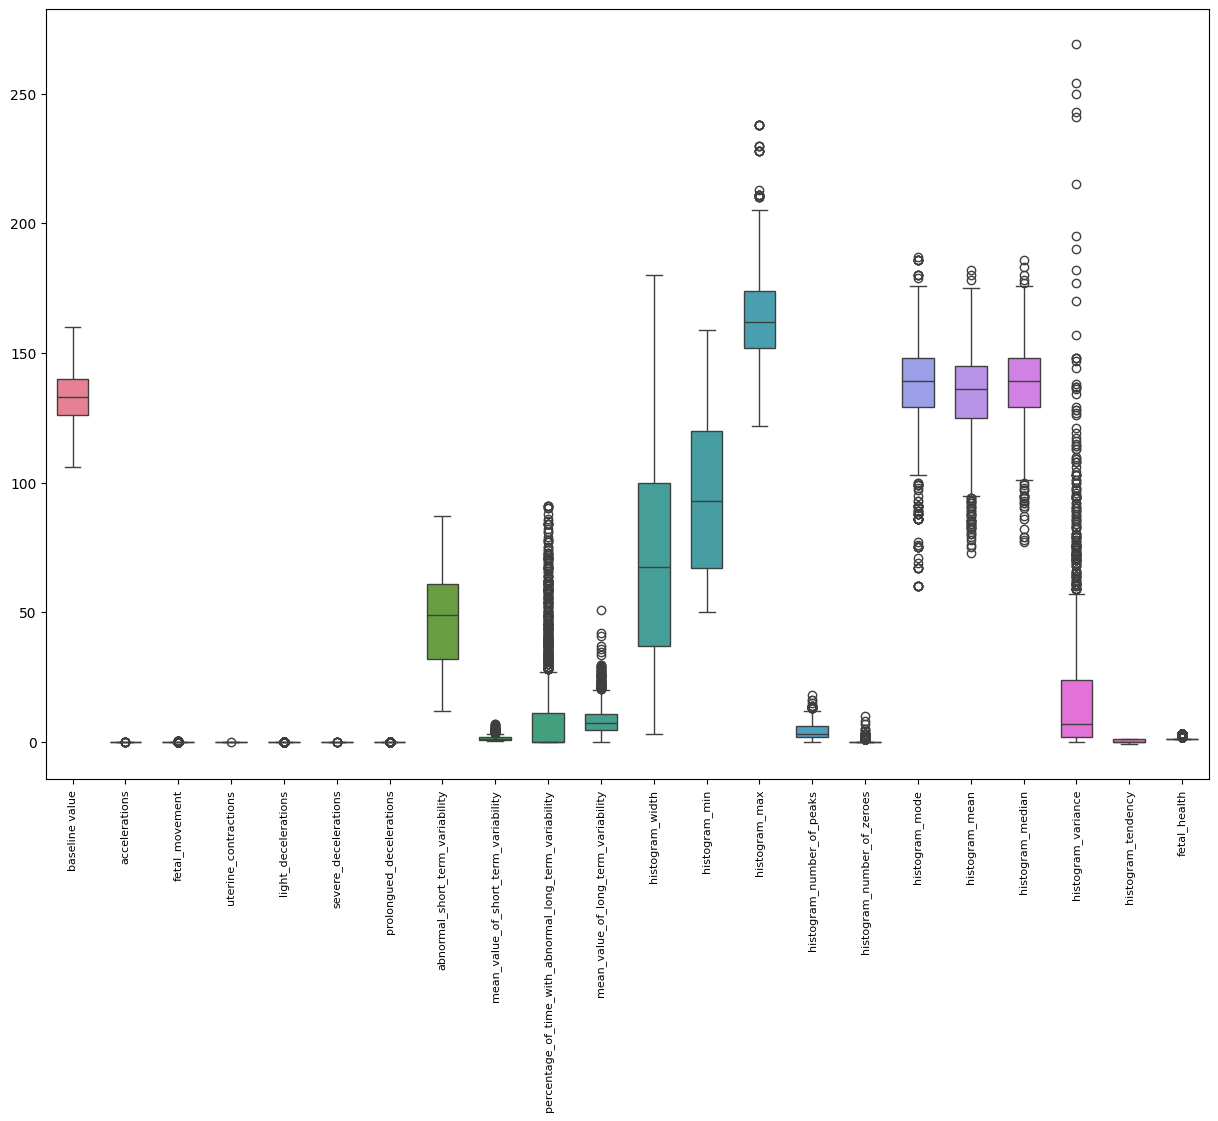

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=fh_dataframe, width=0.6)
plt.xticks(rotation=90, fontsize=8)
plt.show()


Alta dispersão: "baseline value" e "high_prominence_peak" apresentam grande amplitude e muitos outliers, indicando alta variabilidade ou anomalias.

Baixa dispersão: "serious_accidents" e "real_payment" têm valores muito baixos ou constantes na maioria das vezes.

Outliers: Muitas variáveis, como "histogram_mean" e "baseline value", possuem muitos outliers, que precisam ser analisados.

Diferenças de escala: Algumas variáveis têm valores médios muito maiores que as outras, o que pode exigir normalização.

Distribuições assimétricas: Variáveis como "histogram_skewness" mostram caudas longas, indicando possíveis distribuições não normais.

Analisar como a variável baseline value se distribui entre as categorias de saúde fetal. Essa análise pode revelar padrões ou diferenças significativas que ajudam a entender melhor o comportamento dos dados em relação à variável target, além de identificar potenciais variáveis com poder discriminativo para um modelo preditivo.

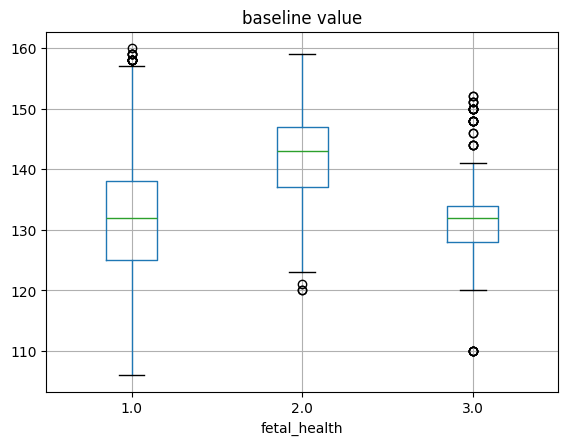

In [ ]:
boxplots = fh_dataframe.boxplot(
    column='baseline value', by='fetal_health', fontsize=10)

plt.suptitle('')
plt.show()

O boxplot mostra que o "baseline value" varia com "fetal_health", sendo maior no grupo com fetal_health = 2.0 (maior mediana e dispersão). O grupo fetal_health = 1.0 tem os menores valores e fetal_health = 3.0 apresenta valores intermediários, com vários outliers acima de 150. Isso indica que o "baseline value" pode estar relacionado ao estado de saúde fetal.

Vamos avaliar se a variável baseline value possui diferenças significativas entre os grupos de saúde fetal classificados como "Normal" e "Pathological". Essa análise é importante para entender se essa variável pode ser um fator discriminante entre essas duas condições. Além disso, o teste T ajuda a determinar se a diferença observada entre as médias dos grupos é estatisticamente significativa, enquanto a verificação da variância auxilia na validação das suposições do teste.

In [ ]:
from scipy.stats import ttest_ind

group_normal = fh_dataframe['fetal_health'] == 1
group_pathological = fh_dataframe['fetal_health'] == 3

variable = fh_dataframe['baseline value']

print('Variância do grupo Normal: %0.3f' % variable[group_normal].var())
print('Variância do grupo Pathological: %0.3f' % variable[group_pathological].var())

t_stat, p_value = ttest_ind(variable[group_normal], variable[group_pathological])

print(f'Teste t: Estatística = {t_stat:.3f}, Valor-p = {p_value:.3f}')


Variância do grupo Normal: 89.388
Variância do grupo Pathological: 88.982
Teste t: Estatística = 0.393, Valor-p = 0.695



A análise mostra que não há diferença estatisticamente significativa entre os valores médios da variável "baseline value" para os grupos Normal (fetal_health = 1.0) e Pathological (fetal_health = 3.0), com um valor-p de 0.695 (acima de 0.05). Isso indica que, com base neste teste, a variável "baseline value" não é um bom discriminante entre essas duas condições de saúde fetal. Além disso, as variâncias dos grupos são muito próximas (89.388 e 88.982), sugerindo homogeneidade das variâncias, o que valida a aplicação do teste t.

Estamos criando um gráfico de coordenadas paralelas para comparar como as variáveis baseline value, accelerations, fetal_movement, e uterine_contractions se comportam para cada classe de saúde fetal. Esse tipo de gráfico ajuda a entender se existem padrões consistentes nas variáveis que diferenciam os grupos. Basicamente, é como traçar várias linhas para ver se elas seguem comportamentos parecidos ou diferentes entre as categorias, o que pode indicar relações úteis para análise ou modelagem.

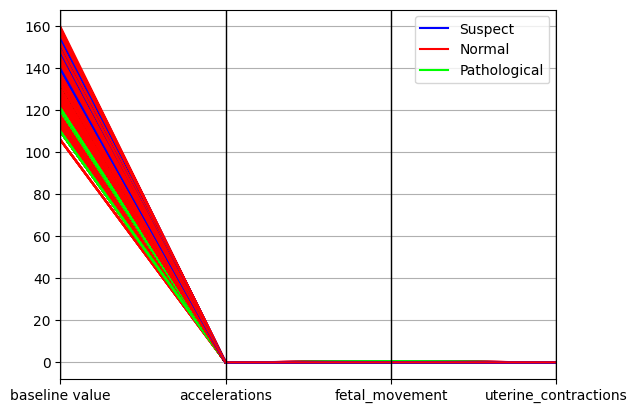

In [ ]:
from pandas.plotting import parallel_coordinates

fh_dataframe['labels'] = fh_dataframe['fetal_health'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})
variables = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions']
pll = parallel_coordinates(fh_dataframe[variables + ['labels']], 'labels', color=('#0000FF', '#FF0000', '#00FF00'))
plt.show()


Estamos criando gráficos de densidade para todas as colunas. Esses gráficos ajudam a entender como os valores das variáveis estão distribuídos, como se fosse um mapa da concentração dos dados em diferentes intervalos. Isso é útil para ver se os dados seguem uma distribuição normal ou se há picos, caudas longas ou outras características importantes que podem impactar as análises futuras.

<Axes: title={'center': 'Grupo 2'}, ylabel='Density'>

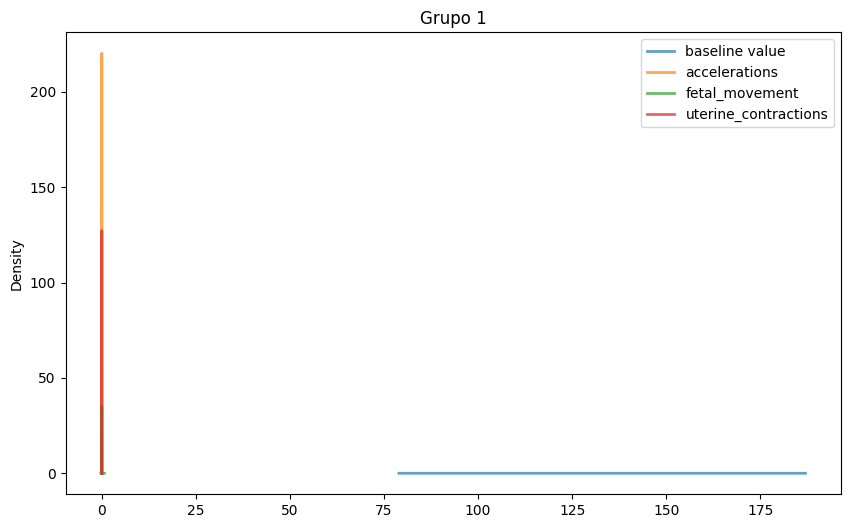

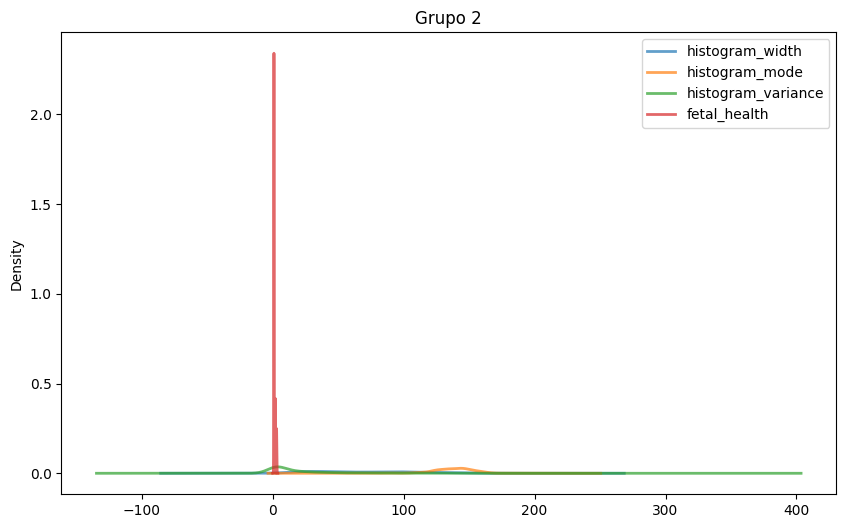

In [ ]:
group1 = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions']
group2 = ['histogram_width', 'histogram_mode', 'histogram_variance', 'fetal_health']

fh_dataframe[group1].plot(kind='density', figsize=(10, 6), title='Grupo 1', linewidth=2, alpha=0.7)

fh_dataframe[group2].plot(kind='density', figsize=(10, 6), title='Grupo 2', linewidth=2, alpha=0.7)


Aqui estamos criando um histograma para ver quantas amostras existem em cada categoria de saúde fetal. É como contar quantos exemplos temos para cada grupo (Normal, Suspect e Pathological). Isso ajuda a verificar se as classes estão equilibradas ou se precisamos lidar com um desbalanceamento antes de seguir com os modelos.

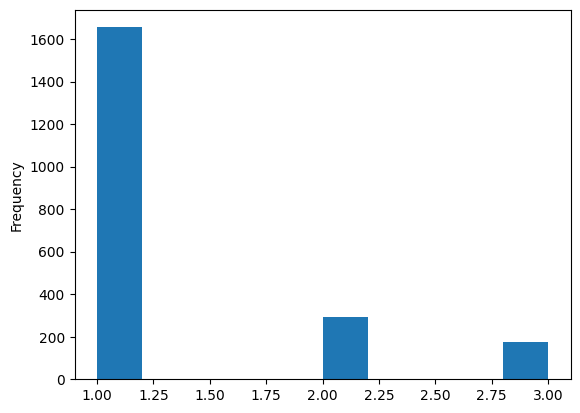

In [ ]:
variable = fh_dataframe['fetal_health']
single_distribution = variable.plot(kind='hist')

A figura anterior mostra que existe uma quantidade muito maior de fetos classificados como normais em relação à suspeitos e patológicos.

*Diagramas de Dispersão*

Aqui estamos criando um gráfico de dispersão para ver como baseline value e uterine_contractions se relacionam, enquanto usamos cores diferentes para cada grupo de saúde fetal (Normal, Suspect e Pathological). Isso ajuda a enxergar se existe alguma separação ou padrão que diferencia os grupos e pode dar pistas sobre a relevância dessas variáveis para a análise ou modelagem.

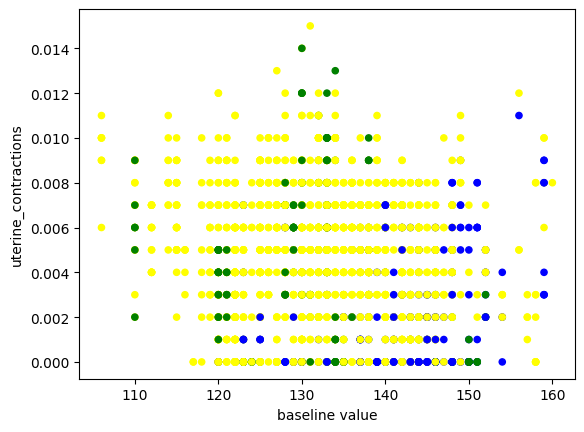

In [ ]:
palette = {0: 'red', 1: 'yellow', 2: 'blue', 3: 'green'}
colors = [palette[int(c)] for c in fh_dataframe['fetal_health']]
simple_scatterplot = fh_dataframe.plot(
                kind='scatter', x='baseline value',
                y='uterine_contractions', c=colors)

Entendendo a correlação:

O gráfico sugere uma relação moderada ou fraca entre baseline value e uterine_contractions, já que os valores não mostram uma tendência clara

Covariância:

Aqui estamos calculando a covariância entre as variáveis numéricas. Basicamente, isso mostra como duas variáveis mudam juntas — se uma aumenta quando a outra aumenta, ou se elas não têm relação clara. Isso ajuda a identificar relações entre as variáveis e pode guiar na escolha de quais delas são mais relevantes ou redundantes na análise.

In [ ]:
fh_dataframe.cov(numeric_only=True)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,96.842216,-3.064547e-03,-1.535508e-02,-4.243626e-03,-4.632750e-03,-3.017741e-05,-6.072470e-04,51.699944,-2.430296,51.710615,...,105.194187,48.580514,-3.306851,-0.032966,114.293644,110.965926,112.359840,-38.194365,1.764270e+00,0.895720
accelerations,-0.003065,1.494279e-05,8.701087e-06,1.021237e-06,-1.242874e-06,-9.528416e-09,-2.913302e-07,-0.018581,0.000707,-0.026593,...,-0.017630,0.027340,0.002171,-0.000017,0.015426,0.016295,0.015258,0.014081,6.710531e-05,-0.000865
fetal_movement,-0.015355,8.701087e-06,2.177701e-03,-9.455754e-06,6.800456e-06,-2.934824e-08,7.320941e-06,-0.083213,0.005000,-0.063611,...,-0.212322,0.083615,0.022662,-0.000585,-0.046778,-0.065253,-0.048829,0.242515,-4.393736e-05,0.002523
uterine_contractions,-0.004244,1.021237e-06,-9.455754e-06,8.679323e-06,2.486168e-06,1.145924e-09,1.338908e-07,-0.011792,0.000754,-0.016618,...,-0.009869,0.006490,0.000719,0.000120,-0.005060,-0.008614,-0.005979,0.020368,-1.301314e-04,-0.000371
light_decelerations,-0.004633,-1.242874e-06,6.800456e-06,2.486168e-06,8.762835e-06,1.824647e-08,3.940003e-07,-0.006064,0.001470,-0.014774,...,-0.048437,0.011582,0.003472,0.000492,-0.016838,-0.024343,-0.016641,0.048405,1.294892e-07,0.000107
severe_decelerations,-0.000030,-9.528416e-09,-2.934824e-08,1.145924e-09,1.824647e-08,3.283272e-09,4.190139e-10,0.000033,0.000002,-0.000032,...,-0.000122,-0.000022,0.000001,0.000002,-0.000202,-0.000142,-0.000133,0.000227,-2.466936e-06,0.000005
prolongued_decelerations,-0.000607,-2.913302e-07,7.320941e-06,1.338908e-07,3.940003e-07,4.190139e-10,3.480381e-07,0.000469,0.000139,-0.001491,...,-0.004826,0.001273,0.000388,0.000024,-0.004218,-0.004495,-0.003796,0.008604,-7.762249e-05,0.000176
abnormal_short_term_variability,51.699944,-1.858083e-02,-8.321266e-02,-1.179214e-02,-6.064151e-03,3.344430e-05,4.688606e-04,295.592844,-6.540429,145.309543,...,139.953491,-34.493396,-8.496738,-1.812331,16.437408,19.987681,29.836657,-72.954367,-6.036390e-02,4.977125
mean_value_of_short_term_variability,-2.430296,7.073292e-04,5.000233e-03,7.537698e-04,1.469837e-03,1.727298e-06,1.391302e-04,-6.540429,0.780115,-7.641182,...,-16.254537,6.483402,1.306234,0.165997,-4.450356,-6.134473,-4.294633,14.226624,-3.568296e-02,-0.056100
percentage_of_time_with_abnormal_long_term_variability,51.710615,-2.659289e-02,-6.361143e-02,-1.661767e-02,-1.477366e-02,-3.243606e-05,-1.490506e-03,145.309543,-7.641182,338.445182,...,229.943960,-93.483633,-15.154713,-1.581883,49.788875,63.777899,49.629855,-150.086382,4.773761e-01,4.816570


Estamos calculando a matriz de correlação entre as variáveis. Isso ajuda a identificar relações fortes (positivas ou negativas) entre os dados. Por exemplo, se duas variáveis têm uma correlação alta, uma pode ser usada para prever a outra, ou pode indicar redundância na modelagem. É um passo essencial para entender o comportamento das variáveis antes de partir para a construção de modelos.

In [ ]:
fh_dataframe.corr(numeric_only=True)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


Aqui estamos calculando o quadrado dos valores da matriz de correlação. Isso mostra o quanto uma variável consegue "explicar" a outra em termos de variação, como uma medida de força da relação. Por exemplo, um valor de
R2 = 0.81 significa que 81% da variação de uma variável está associada à variação da outra. Esse passo ajuda a identificar variáveis altamente explicativas ou redundantes para análises futuras.

In [ ]:
fh_dataframe.corr(numeric_only=True)**2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,0.006490,0.001118,0.021425,2.529114e-02,0.002864,0.010941,0.093373,0.078180,0.081584,...,0.130769,0.075685,0.012981,0.000023,0.502670,0.522904,0.622910,0.017939,8.614430e-02,0.021949
accelerations,0.006490,1.000000,0.002327,0.008041,1.179716e-02,0.001851,0.016320,0.078164,0.042919,0.139833,...,0.023804,0.155352,0.036272,0.000038,0.059346,0.073081,0.074447,0.015801,8.076871e-04,0.132544
fetal_movement,0.001118,0.002327,1.000000,0.004731,2.423445e-03,0.000120,0.070715,0.010757,0.014717,0.005490,...,0.023691,0.009971,0.027111,0.000315,0.003745,0.008041,0.005232,0.032163,2.375915e-06,0.007746
uterine_contractions,0.021425,0.008041,0.004731,1.000000,8.127006e-02,0.000046,0.005935,0.054201,0.083914,0.094008,...,0.012842,0.015071,0.006838,0.003352,0.010994,0.035158,0.019681,0.056921,5.229250e-03,0.041981
light_decelerations,0.025291,0.011797,0.002423,0.081270,1.000000e+00,0.011572,0.050900,0.014197,0.316035,0.073594,...,0.306399,0.047543,0.158102,0.055364,0.120570,0.278103,0.150999,0.318423,5.128424e-09,0.003466
severe_decelerations,0.002864,0.001851,0.000120,0.000046,1.157195e-02,1.000000,0.000154,0.001153,0.001165,0.000947,...,0.005180,0.000447,0.000049,0.001887,0.046294,0.025177,0.025745,0.018611,4.967870e-03,0.017407
prolongued_decelerations,0.010941,0.016320,0.070715,0.005935,5.090047e-02,0.000154,1.000000,0.002137,0.071295,0.018860,...,0.076599,0.014453,0.049666,0.003184,0.190459,0.238792,0.197827,0.253312,4.639911e-02,0.235088
abnormal_short_term_variability,0.093373,0.078164,0.010757,0.054201,1.419716e-02,0.001153,0.002137,1.000000,0.185507,0.211060,...,0.075833,0.012501,0.028077,0.022289,0.003406,0.005558,0.014390,0.021443,3.303862e-05,0.222021
mean_value_of_short_term_variability,0.078180,0.042919,0.014717,0.083914,3.160350e-01,0.001165,0.071295,0.185507,1.000000,0.221143,...,0.387592,0.167340,0.251432,0.070853,0.094609,0.198382,0.112969,0.308972,4.374458e-03,0.010688
percentage_of_time_with_abnormal_long_term_variability,0.081584,0.139833,0.005490,0.094008,7.359418e-02,0.000947,0.018860,0.211060,0.221143,1.000000,...,0.178789,0.080193,0.078009,0.014831,0.027295,0.049426,0.034775,0.079263,1.804655e-03,0.181601


Usando a correlação não paramétrica

Estamos calculando duas medidas de correlação entre baseline value e accelerations. O coeficiente de Pearson mede a força de uma relação linear, ou seja, o quanto uma variável aumenta ou diminui de forma proporcional à outra. Já o coeficiente de Spearman mede relações monotônicas, ou seja, mesmo que a relação não seja perfeitamente linear, ele verifica se há uma tendência consistente (uma sempre aumenta ou diminui conforme a outra). Esses valores ajudam a entender se essas variáveis estão conectadas e como.

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = fh_dataframe['baseline value']
b = fh_dataframe['accelerations']

rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)

print('Pearson r %0.3f | Spearman rho %0.3f' % (r_coef, rho_coef))


Pearson r -0.081 | Spearman rho -0.113


Teste qui-quadrado para tabelas

Aqui estamos usando o teste de Qui-Quadrado para verificar se há uma relação significativa entre as categorias de saúde fetal (fetal_health) e os intervalos de valores da variável baseline value. Esse teste mede a independência entre duas variáveis categóricas, e o valor-p nos diz se essa relação é significativa. Se o valor-p for pequeno (geralmente menor que 0.05), podemos considerar que existe uma associação, o que pode indicar que baseline value é relevante para diferenciar os grupos de saúde fetal.

In [ ]:
from scipy.stats import chi2_contingency

bins = pd.qcut(fh_dataframe['baseline value'], q=4)
table = pd.crosstab(fh_dataframe['fetal_health'], bins)
chi2, p, dof, expected = chi2_contingency(table.values)

print('Qui-Quadrado: %0.2f | p-value: %0.3f' % (chi2, p))


Qui-Quadrado: 281.07 | p-value: 0.000
